# Introducción

In [1]:
#Misc
import os
import pickle
import importlib

#Data
import pandas as pd
import numpy as np


# Visualización
import cufflinks as cf
import matplotlib.ticker as tkr
import matplotlib.pyplot as plt
import seaborn as sns

# Opciones
plt.style.use('seaborn-white')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)
cf.set_config_file(theme='white',dimensions=(650,450))
cf.go_offline()

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN

from scipy.stats import kruskal
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [3]:
# Scripts personales
sys.path.insert(1, '../../Datasets/')

# String
import StringUtils 
importlib.reload(StringUtils)

import PlotUtils 
importlib.reload(PlotUtils)

import SupervisedUtils 
importlib.reload(SupervisedUtils)

<module 'SupervisedUtils' from 'c:\\Users\\JesúsAdolfoValenciaM\\Diplomado-en-ciencia-de-datos\\Proyecto\\Modulo 5\\M3\\../../Datasets\\SupervisedUtils.py'>

In [4]:
def get_random_string(length):
    # choose from all lowercase letter
    letters = string.ascii_lowercase
    result_str = ''.join(random.choice(letters) for i in range(length))
    result_str = 'trybase_' + result_str
    return result_str

def plot_method(df,var1,var2,tad,method,title=None):
    fig = px.scatter(x=df[var1],y=df[var2],color=tad[method].astype(str), symbol=tad[method].astype(str))
    fig.update_traces(marker=dict(size=5,
                                  line=dict(width=0.2,
                                            color='white')),
                      selector=dict(mode='markers'))
    if title:
        fig.update_layout(height=500, width=750,title=title)
        fig.show()
    else:
        fig.update_layout(height=500, width=750)
        fig.show()
    
    

def plot_method_all(method,tad,title=None):
    n_colors = len(set(tad[method]))

    fig1 = px.scatter(x=X_PCA['C1'],y=X_PCA['C2'],color=tad[method].astype(str), symbol=tad[method].astype(str))
    fig2 = px.scatter(x=X_PCA['C1'],y=X_PCA['C3'],color=tad[method].astype(str), symbol=tad[method].astype(str))
    fig3 = px.scatter(x=X_PCA['C1'],y=X_PCA['C4'],color=tad[method].astype(str), symbol=tad[method].astype(str))
    fig4 = px.scatter(x=X_PCA['C2'],y=X_PCA['C3'],color=tad[method].astype(str), symbol=tad[method].astype(str))
    fig5 = px.scatter(x=X_PCA['C2'],y=X_PCA['C4'],color=tad[method].astype(str), symbol=tad[method].astype(str))
    fig6 = px.scatter(x=X_PCA['C3'],y=X_PCA['C4'],color=tad[method].astype(str), symbol=tad[method].astype(str))


    fig11 = px.scatter(x=X_MDS['V1'],y=X_MDS['V2'],color=tad[method].astype(str), symbol=tad[method].astype(str))
    fig22 = px.scatter(x=X_MDS['V1'],y=X_MDS['V3'],color=tad[method].astype(str), symbol=tad[method].astype(str))
    fig33 = px.scatter(x=X_MDS['V1'],y=X_MDS['V4'],color=tad[method].astype(str), symbol=tad[method].astype(str))
    fig44 = px.scatter(x=X_MDS['V2'],y=X_MDS['V3'],color=tad[method].astype(str), symbol=tad[method].astype(str))
    fig55 = px.scatter(x=X_MDS['V2'],y=X_MDS['V4'],color=tad[method].astype(str), symbol=tad[method].astype(str))
    fig66 = px.scatter(x=X_MDS['V3'],y=X_MDS['V4'],color=tad[method].astype(str), symbol=tad[method].astype(str))


    fig = make_subplots(rows=3, cols=4,subplot_titles=("PCA", "MDS","PCA", "MDS"))

    for i in range(n_colors):
        fig.add_trace(fig1['data'][i], row=1, col=1)
        fig.add_trace(fig11['data'][i], row=1, col=2)

        fig.add_trace(fig2['data'][i], row=2, col=1)
        fig.add_trace(fig22['data'][i], row=2, col=2)

        fig.add_trace(fig3['data'][i], row=3, col=1)
        fig.add_trace(fig33['data'][i], row=3, col=2)

        fig.add_trace(fig4['data'][i], row=1, col=3)
        fig.add_trace(fig44['data'][i], row=1, col=4)

        fig.add_trace(fig5['data'][i], row=2, col=3)
        fig.add_trace(fig55['data'][i], row=2, col=4)

        fig.add_trace(fig6['data'][i], row=3, col=3)
        fig.add_trace(fig66['data'][i], row=3, col=4)


    names = set()
    fig.for_each_trace(
        lambda trace:
            trace.update(showlegend=False)
            if (trace.name in names) else names.add(trace.name))

    fig['layout']['xaxis']['title']="C1"
    fig['layout']['yaxis']['title']='C2'
    fig['layout']['xaxis2']['title']="V1"
    fig['layout']['yaxis2']['title']='V2'

    fig['layout']['xaxis3']['title']="C2"
    fig['layout']['yaxis3']['title']='C3'
    fig['layout']['xaxis4']['title']="V2"
    fig['layout']['yaxis4']['title']='V3'

    fig['layout']['xaxis5']['title']="C1"
    fig['layout']['yaxis5']['title']='C3'
    fig['layout']['xaxis6']['title']="V1"
    fig['layout']['yaxis6']['title']='V3'

    fig['layout']['xaxis7']['title']="C2"
    fig['layout']['yaxis7']['title']='C4'
    fig['layout']['xaxis8']['title']="V2"
    fig['layout']['yaxis8']['title']='V4'

    fig['layout']['xaxis9']['title']="C1"
    fig['layout']['yaxis9']['title']='C4'
    fig['layout']['xaxis10']['title']="V1"
    fig['layout']['yaxis10']['title']='V4'

    fig['layout']['xaxis11']['title']="C3"
    fig['layout']['yaxis11']['title']='C4'
    fig['layout']['xaxis12']['title']="V3"
    fig['layout']['yaxis12']['title']='V4'





    fig.update_traces(marker=dict(size=5,
                                  line=dict(width=0.2,
                                            color='white')),
                      selector=dict(mode='markers'))
    
    if title:
        fig.update_layout(height=1000, width=1250, title_text=title)
    else:
        fig.update_layout(height=1000, width=1250, title_text= method+ ": " + str(n_colors) + " Clusters")
    fig.show()
    
def inertia(df, min_, max_):
    
    x = [i for i in range(min_, max_)]
    inertia_ = []
    
    for ki in x:
        km = KMeans(n_clusters=ki)
        km.fit(df)
        inertia_.append(km.inertia_)
        
    sns.lineplot(
        x=x, y=inertia_,
        marker="o"
    )
    
def pruebas_hipotesis(df1, df2, col_list):
    p_values = []
    dec = []
    for col in col_list:
        stat, p_value = kruskal(df1[col], df2[col])
        p_values.append(p_value)
        if p_value <= 0.05:
            decision = 'Distribución diferente'
        else:
            decision = 'Distribución parecida'
        dec.append(decision)
    return pd.DataFrame(data = {'variables': col_list, 'p_value': p_values, 'decision': dec})

# Bases de datos

## Base módulo 1

In [5]:
TMDb = pd.read_feather('../M1/DBM1')
TMDb.head(2)

,id,genres,original_language,overview,popularity,year,month,day,budget,revenue,runtime,status,tagline,vote_average,vote_count,keywords,poster_path,backdrop_path
0,610150,Animation-Science Fiction-Action,ja,The Red Ribbon Army an evil organization that ...,7294.015,2022.0,6.0,11.0,0.0,68759433.0,99.0,Released,A super awakening and calamity is born.,7.330,253.0,android-sequel-attack-based on manga-fighting-...,/rugyJdeoJm7cSJL1q4jBpTNbxyU.jpg,/ugS5FVfCI3RV0ZwZtBV3HAV75OX.jpg
1,616037,Action-Adventure-Fantasy,en,After his retirement is interrupted by Gorr th...,5207.555,2022.0,7.0,6.0,250000000.0,746900000.0,119.0,Released,The one is not the only.,6.766,2167.0,ex-girlfriend-hero-greek mythology-sequel-supe...,/pIkRyD18kl4FhoCNQuWxWu5cBLM.jpg,/vvObT0eIWGlArLQx3K5wZ0uT812.jpg


## Base de puntuaciones por usuarios de MovieLens

In [6]:
# ratings = pd.read_feather('../../Datasets/MovieLens/ratings')
# ratings['rating']=ratings['rating']*2
# ratings.head(2)
# ratings.to_feather('ratings',compression='zstd')

In [7]:
ratings = pd.read_feather('../../Datasets/MovieLens/ratings')
ratings.head(2)

,userId,movieId,rating,timestamp
0,1,296,10.0,1147880044
1,1,306,7.0,1147868817


In [8]:
ratings.drop(columns=['timestamp'],inplace=True)
ratings.columns = ['userId','id','rating']

In [9]:
ratings.shape

(25000095, 3)

In [10]:
ratings = ratings.sample(frac=0.05,random_state=12345)

### Analisis exploratorio 

In [11]:
print(f'Hay un total de {len(ratings["userId"].value_counts())} usuarios')

Hay un total de 148024 usuarios


In [12]:
print(f'Hay un total de {len(ratings["id"].value_counts())} peliculas calificadas')

Hay un total de 25210 peliculas calificadas


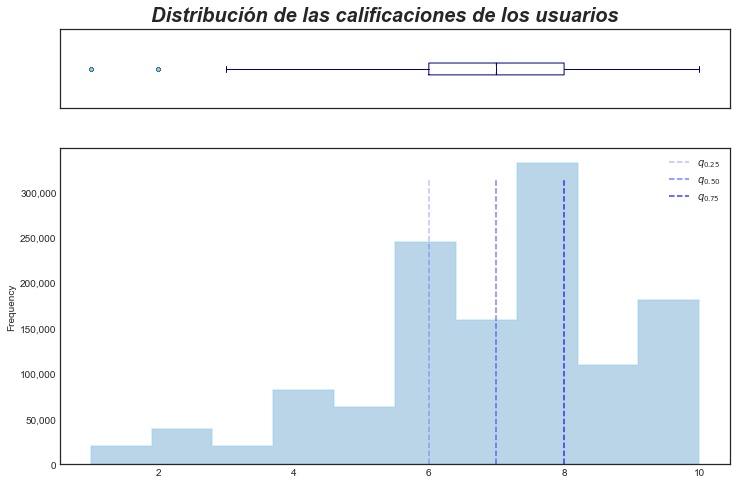

In [13]:
PlotUtils.hist_box(ratings,'rating',ctitle = 'Distribución de las calificaciones de los usuarios')

# Preprocesamiento de datos

## Generación de características

## Base de películas

In [14]:
TMDb.head(2)

,id,genres,original_language,overview,popularity,year,month,day,budget,revenue,runtime,status,tagline,vote_average,vote_count,keywords,poster_path,backdrop_path
0,610150,Animation-Science Fiction-Action,ja,The Red Ribbon Army an evil organization that ...,7294.015,2022.0,6.0,11.0,0.0,68759433.0,99.0,Released,A super awakening and calamity is born.,7.330,253.0,android-sequel-attack-based on manga-fighting-...,/rugyJdeoJm7cSJL1q4jBpTNbxyU.jpg,/ugS5FVfCI3RV0ZwZtBV3HAV75OX.jpg
1,616037,Action-Adventure-Fantasy,en,After his retirement is interrupted by Gorr th...,5207.555,2022.0,7.0,6.0,250000000.0,746900000.0,119.0,Released,The one is not the only.,6.766,2167.0,ex-girlfriend-hero-greek mythology-sequel-supe...,/pIkRyD18kl4FhoCNQuWxWu5cBLM.jpg,/vvObT0eIWGlArLQx3K5wZ0uT812.jpg


In [15]:
TMDb.isna().sum().to_frame().T

,id,genres,original_language,overview,popularity,year,month,day,budget,revenue,runtime,status,tagline,vote_average,vote_count,keywords,poster_path,backdrop_path
0,0,222766,0,122598,0,58800,58800,58800,0,0,39321,0,639575,0,0,533514,201761,523454


In [16]:
movies = TMDb.copy()
movies.drop(columns=['overview','month','day','status','tagline','keywords','poster_path','backdrop_path'],inplace=True)
movies = movies.loc[movies['genres'].isna()==False].reset_index(drop=True)
# movies = movies.loc[movies['overview'].isna()==False].reset_index(drop=True)
# movies = movies.loc[movies['budget']>0].reset_index(drop=True)
# movies = movies.loc[movies['vote_average']>0].reset_index(drop=True)
print(movies.shape)
movies.head(2)

(527552, 10)


,id,genres,original_language,popularity,year,budget,revenue,runtime,vote_average,vote_count
0,610150,Animation-Science Fiction-Action,ja,7294.015,2022.0,0.0,68759433.0,99.0,7.330,253.0
1,616037,Action-Adventure-Fantasy,en,5207.555,2022.0,250000000.0,746900000.0,119.0,6.766,2167.0


In [17]:
movies.isna().sum().to_frame().T

,id,genres,original_language,popularity,year,budget,revenue,runtime,vote_average,vote_count
0,0,0,0,0,16731,0,0,17781,0,0


In [18]:
movies = movies.fillna(0)

In [19]:
counts = movies['genres'].str.split('-').explode().value_counts(True)
mask = counts>0.05
genres_mask = counts[mask].index
genresaux = movies['genres'].str.split('-').explode().reset_index()
genresaux.loc[~genresaux['genres'].isin(genres_mask),'genres'] = 'OTROS'
genresaux = genresaux.reset_index().pivot_table(index='index',columns='genres',values='level_0',aggfunc='count',fill_value=0)
genresaux.columns = ['genre_' + col for col in genresaux.columns]
genresaux = genresaux/genresaux # <------ ¿Todo con 1?
genresaux = genresaux.fillna(0)
movies = pd.concat([movies,genresaux],axis=1).drop(columns = ['genres'])
movies.head(2)

,id,original_language,popularity,year,budget,revenue,runtime,vote_average,vote_count,genre_Animation,genre_Comedy,genre_Documentary,genre_Drama,genre_OTROS,genre_Romance
0,610150,ja,7294.015,2022.0,0.0,68759433.0,99.0,7.330,253.0,1.0,0.0,0.0,0.0,1.0,0.0
1,616037,en,5207.555,2022.0,250000000.0,746900000.0,119.0,6.766,2167.0,0.0,0.0,0.0,0.0,1.0,0.0


In [20]:
counts = movies['original_language'].value_counts(True)
mask = counts>0.05
language_mask = counts[mask].index
movies.loc[~movies['original_language'].isin(language_mask),'original_language'] = 'OTROS'
movies = pd.get_dummies(movies,columns = ['original_language'])
movies.head(2)

,id,popularity,year,budget,revenue,runtime,vote_average,vote_count,genre_Animation,genre_Comedy,genre_Documentary,genre_Drama,genre_OTROS,genre_Romance,original_language_OTROS,original_language_de,original_language_en,original_language_es,original_language_fr
0,610150,7294.015,2022.0,0.0,68759433.0,99.0,7.330,253.0,1.0,0.0,0.0,0.0,1.0,0.0,1,0,0,0,0
1,616037,5207.555,2022.0,250000000.0,746900000.0,119.0,6.766,2167.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,1,0,0


In [21]:
movies_id = movies['id']
movies = movies.drop(columns=['id'])
movies_cols = movies.columns
movies.head(2)

,popularity,year,budget,revenue,runtime,vote_average,vote_count,genre_Animation,genre_Comedy,genre_Documentary,genre_Drama,genre_OTROS,genre_Romance,original_language_OTROS,original_language_de,original_language_en,original_language_es,original_language_fr
0,7294.015,2022.0,0.0,68759433.0,99.0,7.330,253.0,1.0,0.0,0.0,0.0,1.0,0.0,1,0,0,0,0
1,5207.555,2022.0,250000000.0,746900000.0,119.0,6.766,2167.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,1,0,0


### Escalamiento 

In [22]:
sc = MinMaxScaler()
movies = sc.fit_transform(movies)
movies = pd.DataFrame(movies)
movies.columns = movies_cols
movies['id'] = movies_id

movies.head(2)

,popularity,year,budget,revenue,runtime,vote_average,vote_count,genre_Animation,genre_Comedy,genre_Documentary,genre_Drama,genre_OTROS,genre_Romance,original_language_OTROS,original_language_de,original_language_en,original_language_es,original_language_fr,id
0,1.000000,0.997041,0.0000,0.014373,0.001925,0.7330,0.007865,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,610150
1,0.713926,0.997041,0.3125,0.156132,0.002314,0.6766,0.067363,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,616037


## Base de calificaciones

In [23]:
ratings.head(2)

,userId,id,rating
1469586,9816,3481,8.0
16590428,107641,4995,10.0


In [24]:
ratings['rating'] = ratings['rating']/10
ratings.head(2)

,userId,id,rating
1469586,9816,3481,0.8
16590428,107641,4995,1.0


## Generación de la TAD

In [25]:
TAD = ratings.merge(movies,on='id')
TAD.head(2)

,userId,id,rating,popularity,year,budget,revenue,runtime,vote_average,vote_count,genre_Animation,genre_Comedy,genre_Documentary,genre_Drama,genre_OTROS,genre_Romance,original_language_OTROS,original_language_de,original_language_en,original_language_es,original_language_fr
0,9816,3481,0.8,0.000627,0.968935,0.0,0.000272,0.001867,0.61,0.000901,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,112416,3481,0.8,0.000627,0.968935,0.0,0.000272,0.001867,0.61,0.000901,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [26]:
TAD.shape

(595583, 21)

In [27]:
genres_cols = [col for col in TAD.columns if 'genre_' in col]
language_cols = [col for col in TAD.columns if 'original_language_' in col]

In [28]:
for v in genres_cols:
    TAD[v] = np.multiply(TAD['rating'],TAD[v])

for v in language_cols:
    TAD[v] = np.multiply(TAD['rating'],TAD[v])

In [29]:
TAD.head()

,userId,id,rating,popularity,year,budget,revenue,runtime,vote_average,vote_count,genre_Animation,genre_Comedy,genre_Documentary,genre_Drama,genre_OTROS,genre_Romance,original_language_OTROS,original_language_de,original_language_en,original_language_es,original_language_fr
0,9816,3481,0.8,0.000627,0.968935,0.0,0.000272,0.001867,0.61,0.000901,0.0,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.8,0.0,0.0
1,112416,3481,0.8,0.000627,0.968935,0.0,0.000272,0.001867,0.61,0.000901,0.0,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.8,0.0,0.0
2,110830,3481,0.8,0.000627,0.968935,0.0,0.000272,0.001867,0.61,0.000901,0.0,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.8,0.0,0.0
3,32565,3481,1.0,0.000627,0.968935,0.0,0.000272,0.001867,0.61,0.000901,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,42516,3481,0.8,0.000627,0.968935,0.0,0.000272,0.001867,0.61,0.000901,0.0,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.8,0.0,0.0


In [30]:
feat_op= {'id':['count'],
         'popularity': ['min','max','mean'],
         'year': ['min','max',pd.Series.median],
         'budget':['mean'],
         'revenue':['mean'],
         'runtime':['min','max','mean']}

feat_op

{'id': ['count'],
 'popularity': ['min', 'max', 'mean'],
 'year': ['min',
  'max',
  <function pandas.core.generic.NDFrame._add_numeric_operations.<locals>.median(self, axis: 'int | None | lib.NoDefault' = <no_default>, skipna=True, level=None, numeric_only=None, **kwargs)>],
 'budget': ['mean'],
 'revenue': ['mean'],
 'runtime': ['min', 'max', 'mean']}

In [31]:
genre_op = dict(zip(genres_cols,np.tile(['sum','min','max'],(len(genres_cols),1)).tolist()))
genre_op

{'genre_Animation': ['sum', 'min', 'max'],
 'genre_Comedy': ['sum', 'min', 'max'],
 'genre_Documentary': ['sum', 'min', 'max'],
 'genre_Drama': ['sum', 'min', 'max'],
 'genre_OTROS': ['sum', 'min', 'max'],
 'genre_Romance': ['sum', 'min', 'max']}

In [32]:
language_op = dict(zip(language_cols,np.tile(['sum','min','max'],(len(language_cols),1)).tolist()))
language_op

{'original_language_OTROS': ['sum', 'min', 'max'],
 'original_language_de': ['sum', 'min', 'max'],
 'original_language_en': ['sum', 'min', 'max'],
 'original_language_es': ['sum', 'min', 'max'],
 'original_language_fr': ['sum', 'min', 'max']}

In [33]:
feat_op.update(genre_op)
feat_op.update(language_op)

In [34]:
TAD = TAD.groupby('userId').agg(feat_op)

In [35]:
TAD_columns = [key + '_' + str(j) for key in feat_op.keys() for j in feat_op.get(key)]
TAD_columns

['id_count',
 'popularity_min',
 'popularity_max',
 'popularity_mean',
 'year_min',
 'year_max',
 'year_<function NDFrame._add_numeric_operations.<locals>.median at 0x00000202B35F8B80>',
 'budget_mean',
 'revenue_mean',
 'runtime_min',
 'runtime_max',
 'runtime_mean',
 'genre_Animation_sum',
 'genre_Animation_min',
 'genre_Animation_max',
 'genre_Comedy_sum',
 'genre_Comedy_min',
 'genre_Comedy_max',
 'genre_Documentary_sum',
 'genre_Documentary_min',
 'genre_Documentary_max',
 'genre_Drama_sum',
 'genre_Drama_min',
 'genre_Drama_max',
 'genre_OTROS_sum',
 'genre_OTROS_min',
 'genre_OTROS_max',
 'genre_Romance_sum',
 'genre_Romance_min',
 'genre_Romance_max',
 'original_language_OTROS_sum',
 'original_language_OTROS_min',
 'original_language_OTROS_max',
 'original_language_de_sum',
 'original_language_de_min',
 'original_language_de_max',
 'original_language_en_sum',
 'original_language_en_min',
 'original_language_en_max',
 'original_language_es_sum',
 'original_language_es_min',
 'or

In [36]:
TAD_columns = ['n',
 'popularity_min',
 'popularity_max',
 'popularity_mean',
 'year_min',
 'year_max',
 'year_median',
 'budget_mean',
 'revenue_mean',
 'runtime_min',
 'runtime_max',
 'runtime_mean',
 'genre_Animation_sum',
 'genre_Animation_min',
 'genre_Animation_max',
 'genre_Comedy_sum',
 'genre_Comedy_min',
 'genre_Comedy_max',
 'genre_Documentary_sum',
 'genre_Documentary_min',
 'genre_Documentary_max',
 'genre_Drama_sum',
 'genre_Drama_min',
 'genre_Drama_max',
 'genre_OTROS_sum',
 'genre_OTROS_min',
 'genre_OTROS_max',
 'genre_Romance_sum',
 'genre_Romance_min',
 'genre_Romance_max',
 'original_language_OTROS_sum',
 'original_language_OTROS_min',
 'original_language_OTROS_max',
 'original_language_de_sum',
 'original_language_de_min',
 'original_language_de_max',
 'original_language_en_sum',
 'original_language_en_min',
 'original_language_en_max',
 'original_language_es_sum',
 'original_language_es_min',
 'original_language_es_max',
 'original_language_fr_sum',
 'original_language_fr_min',
 'original_language_fr_max']

In [37]:
TAD.columns=TAD_columns
TAD.head(2)

,n,popularity_min,popularity_max,popularity_mean,year_min,year_max,year_median,budget_mean,revenue_mean,runtime_min,runtime_max,runtime_mean,genre_Animation_sum,genre_Animation_min,genre_Animation_max,genre_Comedy_sum,genre_Comedy_min,genre_Comedy_max,genre_Documentary_sum,genre_Documentary_min,genre_Documentary_max,genre_Drama_sum,genre_Drama_min,genre_Drama_max,genre_OTROS_sum,genre_OTROS_min,genre_OTROS_max,genre_Romance_sum,genre_Romance_min,genre_Romance_max,original_language_OTROS_sum,original_language_OTROS_min,original_language_OTROS_max,original_language_de_sum,original_language_de_min,original_language_de_max,original_language_en_sum,original_language_en_min,original_language_en_max,original_language_es_sum,original_language_es_min,original_language_es_max,original_language_fr_sum,original_language_fr_min,original_language_fr_max
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,3,0.000349,0.001631,0.000982,0.977811,0.987179,0.986686,0.009167,0.002354,0.002023,0.002081,0.002055,0.0,0.0,0.0,0.9,0.0,0.9,0.0,0.0,0.0,1.7,0.0,1.0,1.7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.6,0.7,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8,0.000086,0.003723,0.000891,0.952170,0.989152,0.982742,0.001096,0.000344,0.000000,0.001886,0.001220,0.8,0.0,0.8,1.6,0.0,0.8,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,1.0,0.0,0.0,0.0,0.8,0.0,0.8,0.9,0.0,0.9,4.9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# Modelaje no supervisado

> Una vez que tenemos nuestra TAD, se realizará el entramiento de los siguientes modelos:
> * Ward
> * K-Means
> * Gaussian Mixture

In [ ]:
X = TAD.copy()

In [ ]:
# save_object(X,'XM3')
# X = load_object('XM3.pkl')
# TAD = X.copy()

In [ ]:
X

## Escalamiento de la variable

In [ ]:
# scaler = MinMaxScaler()
# scaler.fit(X)
# X=scaler.transform(X)
# pd.DataFrame(X)

## Reducción de dimensión

In [ ]:
n_comp_wb=2

### PCA

In [ ]:
pca_f = PCA(n_components=n_comp_wb,random_state=1610)
pca_f.fit(X)

In [ ]:
X_PCA = pca_f.transform(X)
X_PCA =  pd.DataFrame(X_PCA)
X_PCA.columns = ['C' + str(x +1)  for x in range(n_comp_wb)]

### MDS

In [ ]:
mds = MDS(n_components=4,random_state=1610)

In [ ]:
X_MDS = mds.fit_transform(X)
X_MDS =  pd.DataFrame(X_MDS)
X_MDS.columns = ['V1','V2','V3','V4']

### Visualización en reducción reducida

In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter(x=X_PCA['C1'],y=X_PCA['C2'])
fig.update_traces(marker=dict(size=5,
                                  line=dict(width=0.2,
                                            color='white')),
                      selector=dict(mode='markers'))
fig.update_layout(height=500, width=750,title='PCA')

In [ ]:
fig = px.scatter(x=X_MDS['V1'],y=X_MDS['V2'])
fig.update_traces(marker=dict(size=5,
                                  line=dict(width=0.2,
                                            color='white')),
                      selector=dict(mode='markers'))
fig.update_layout(height=500, width=750,title='MDS')

## Entrenamiento de modelos

### Inercia

In [ ]:
inertia(X, 2, 10)

In [ ]:
n_clust=5

### Ward

In [ ]:
Ward = AgglomerativeClustering(n_clusters=n_clust)
Ward.fit(X)

In [ ]:
clusters_Ward= Ward.labels_
TAD['Ward'] = clusters_Ward

### KMeans

In [ ]:
Kmeans = KMeans(n_clusters=n_clust)
Kmeans.fit(X)

In [ ]:
clusters_Kmeans= Kmeans.labels_
TAD['KMeans'] = clusters_Kmeans

### GM

In [ ]:
GM =GaussianMixture(n_components=n_clust, random_state=1610)
GM = GM.fit(X)

In [ ]:
clusters_GM= GM.predict(X)
TAD['GM'] = clusters_GM

# Resultados de entrenamiento

## TAD Final

In [ ]:
TAD

## Visualización en dimensión reducida

### Ward

In [ ]:
plot_method_all('Ward',TAD)

### KMeans

In [ ]:
plot_method_all('KMeans',TAD)

### GM

In [ ]:
plot_method_all('GM',TAD)

## Cantidad de elementos en cada cluster

### Ward

In [ ]:
plt.figure(figsize=(20,8),dpi=150)

method = 'Ward'
plot_bar(TAD,method,title='Cantidad de elementos en cada cluster\n Método: '+  method,barlabs=True)

plt.savefig('n_' + method + '_final.png')

### KMeans

In [ ]:
plt.figure(figsize=(20,8),dpi=150)

method = 'KMeans'
plot_bar(TAD,method,title='Cantidad de elementos en cada cluster\n Método: '+  method,barlabs=True)

plt.savefig('n_' + method + '_final.png')

### GM

In [ ]:
plt.figure(figsize=(20,8),dpi=150)

method = 'GM'
plot_bar(TAD,method,title='Cantidad de elementos en cada cluster\n Método: '+  method,barlabs=True)

plt.savefig('n_' + method + '_final.png')

# Perfilamiento

In [ ]:
clusters = []

for i in range(n_clust):
    clusters.append(TAD.loc[TAD['KMeans']==i])

## Pruebas de hipótesis

### Entre las variables de clusters

In [ ]:
VarsKruskal = pd.DataFrame([kruskal(*[x[y] for x in clusters]) for y in X.columns]).applymap(lambda x : '{:.10f}'.format(x))
VarsKruskal.insert(0,'Variable',X.columns)
VarsKruskal

### Contra la TAD

In [ ]:
def highlight(s, props=''):
    return np.where(s == 'Distribución parecida', props, '')

In [ ]:
for i in range(n_clust):
    print('TAD VS ' + 'Cluster ' + str(i))
    display(pruebas_hipotesis(TAD, clusters[i], X.columns).style.apply(highlight, props='color:white;background-color:darkblue', axis=1))

### Entre clusters

In [ ]:
tuckeycol = []
for col in X.columns:
    tuckeycol.append(pairwise_tukeyhsd(endog=TAD[col], groups=TAD['KMeans'], alpha=0.05))

In [ ]:
tuckeyresults = []

for i,col in enumerate(X.columns): 
    print(col)
    dbtemp = pd.read_csv(io.StringIO(tuckeycol[i].summary().as_csv()), sep=",",header=1)
    dbtemp.columns = ['group1', 'group2', 'meandiff', 'p-adj', 'lower', 'upper','reject']
    dbtemp = dbtemp[['group1','group2','p-adj','reject']]
    dbtemp = dbtemp.applymap(lambda x: str(x).strip())
    dbtemp['reject'] = np.where(dbtemp['reject']=='False','Distribución parecida','Distribución diferente')
    tuckeyresults.append(dbtemp['reject'].value_counts(dropna=False).T)
    display(dbtemp.style.apply(highlight, props='color:white;background-color:darkblue', axis=1))
    


In [ ]:
tuckeydecision = pd.concat(tuckeyresults,axis=1).T
tuckeydecision.index = X.columns
tuckeydecision = tuckeydecision.fillna(0)
tuckeydecision['%'] = tuckeydecision['Distribución diferente']/10
tuckeydecision['tuckey_decision'] = np.where(tuckeydecision['%'] > 0.6, 'Conservar la variable' ,'Quitar variable')
tuckeydecision

## Variables no significativas

> De las pruebas obtenidas, podemos decir que las variables no significativas son:
> * startYear
> * runtimeMinutes
> * averageRating
> * numVotes


In [ ]:
notsignificant = ['startYear','runtimeMinutes','averageRating','numVotes']

In [ ]:
TAD_final = TAD.drop(columns = notsignificant)

In [ ]:
TAD_final

## Características de los grupos 

### Cluster 0

In [ ]:
cluster_resume = clusters[0][TAD_final.columns].describe()
print(f'En este cluster, tenemos un total de  {cluster_resume["n"][0]} usuarios')

In [ ]:
cluster_resume  

In [ ]:
print(f'En promedio, los usuarios de este cluster, ven una cantidad de {round(cluster_resume["n"][1],0)} películas')

In [ ]:

plt.figure(figsize=(10,7),dpi=100)
# genres_cluster  = clusters[0][genres_dummied.columns].apply(sum).sort_values(ascending=False)[0:3][np.argsort([1,0,2])]
genres_cluster  = clusters[0][genres_dummied.columns].apply(sum).sort_values(ascending=False)
g = sns.barplot(x=genres_cluster.index,y=genres_cluster,palette='pastel')
# g.bar_label(g.containers[0])
plt.xticks(rotation=90)
plt.title('¿Qué tipo de películas le gustan a este cluster?',size=20,fontstyle='italic',fontweight='bold')
plt.show()


In [ ]:
mean_genre_cluster=cluster_resume[genres_dummied.columns].iloc[1,:].sort_values(ascending=False)

colors = sns.color_palette('pastel')

def absolute_value(val):
    a  = np.round(val/100.*mean_genre_cluster.sum(), 0)
    return int(a)

plt.figure(figsize=(10,7),dpi=100)
plt.pie(mean_genre_cluster, labels = mean_genre_cluster.index, colors = colors, autopct=absolute_value,startangle=90)
plt.title('En promedio, ¿cúantas películas de cada género le gustan este cluster?',size=20,fontstyle='italic',fontweight='bold')
plt.show()

### Cluster 1

In [ ]:
cluster_resume = clusters[1][TAD_final.columns].describe()
print(f'En este cluster, tenemos un total de  {cluster_resume["n"][0]} usuarios')

In [ ]:
cluster_resume  

In [ ]:
print(f'En promedio, los usuarios de este cluster, ven una cantidad de {round(cluster_resume["n"][1],0)} películas')

In [ ]:

plt.figure(figsize=(10,7),dpi=100)
# genres_cluster  = clusters[1][genres_dummied.columns].apply(sum).sort_values(ascending=False)[0:3][np.argsort([1,0,2])]
genres_cluster  = clusters[1][genres_dummied.columns].apply(sum).sort_values(ascending=False)
g = sns.barplot(x=genres_cluster.index,y=genres_cluster,palette='pastel')
# g.bar_label(g.containers[0])
plt.xticks(rotation=90)
plt.title('¿Qué tipo de películas le gustan a este cluster?',size=20,fontstyle='italic',fontweight='bold')
plt.show()

In [ ]:
mean_genre_cluster=cluster_resume[genres_dummied.columns].iloc[1,:].sort_values(ascending=False)

colors = sns.color_palette('pastel')

def absolute_value(val):
    a  = np.round(val/100.*mean_genre_cluster.sum(), 0)
    return int(a)

plt.figure(figsize=(10,7),dpi=100)
plt.pie(mean_genre_cluster, labels = mean_genre_cluster.index, colors = colors, autopct=absolute_value,startangle=90)
plt.title('En promedio, ¿cúantas películas de cada género le gustan este cluster?',size=20,fontstyle='italic',fontweight='bold')
plt.show()

### Cluster 2

In [ ]:
cluster_resume = clusters[2][TAD_final.columns].describe()
print(f'En este cluster, tenemos un total de  {cluster_resume["n"][0]} usuarios')

In [ ]:
cluster_resume  

In [ ]:
print(f'En promedio, los usuarios de este cluster, ven una cantidad de {round(cluster_resume["n"][1],0)} películas')

In [ ]:
plt.figure(figsize=(10,7),dpi=100)
# genres_cluster  = clusters[2][genres_dummied.columns].apply(sum).sort_values(ascending=False)[0:3][np.argsort([1,0,2])]
genres_cluster  = clusters[2][genres_dummied.columns].apply(sum).sort_values(ascending=False)
g = sns.barplot(x=genres_cluster.index,y=genres_cluster,palette='pastel')
# g.bar_label(g.containers[0])
plt.xticks(rotation=90)
plt.title('¿Qué tipo de películas le gustan a este cluster?',size=20,fontstyle='italic',fontweight='bold')
plt.show()

In [ ]:
mean_genre_cluster=cluster_resume[genres_dummied.columns].iloc[1,:].sort_values(ascending=False)

colors = sns.color_palette('pastel')

def absolute_value(val):
    a  = np.round(val/100.*mean_genre_cluster.sum(), 0)
    return int(a)

plt.figure(figsize=(10,7),dpi=100)
plt.pie(mean_genre_cluster, labels = mean_genre_cluster.index, colors = colors, autopct=absolute_value,startangle=90)
plt.title('En promedio, ¿cúantas películas de cada género le gustan este cluster?',size=20,fontstyle='italic',fontweight='bold')
plt.show()

### Cluster 3

In [ ]:
cluster_resume = clusters[3][TAD_final.columns].describe()
print(f'En este cluster, tenemos un total de  {cluster_resume["n"][0]} usuarios')

In [ ]:
cluster_resume  

In [ ]:
print(f'En promedio, los usuarios de este cluster, ven una cantidad de {round(cluster_resume["n"][1],0)} películas')

In [ ]:

plt.figure(figsize=(10,7),dpi=100)
# genres_cluster  = clusters[3][genres_dummied.columns].apply(sum).sort_values(ascending=False)[0:3][np.argsort([1,0,2])]
genres_cluster  = clusters[3][genres_dummied.columns].apply(sum).sort_values(ascending=False)
g = sns.barplot(x=genres_cluster.index,y=genres_cluster,palette='pastel')
# g.bar_label(g.containers[0])
plt.xticks(rotation=90)
plt.title('¿Qué tipo de películas le gustan a este cluster?',size=20,fontstyle='italic',fontweight='bold')
plt.show()


In [ ]:
mean_genre_cluster=cluster_resume[genres_dummied.columns].iloc[1,:].sort_values(ascending=False)

colors = sns.color_palette('pastel')

def absolute_value(val):
    a  = np.round(val/100.*mean_genre_cluster.sum(), 0)
    return int(a)

plt.figure(figsize=(10,7),dpi=100)
plt.pie(mean_genre_cluster, labels = mean_genre_cluster.index, colors = colors, autopct=absolute_value,startangle=90)
plt.title('En promedio, ¿cúantas películas de cada género le gustan este cluster?',size=20,fontstyle='italic',fontweight='bold')
plt.show()

### Cluster 4

In [ ]:
cluster_resume = clusters[4][TAD_final.columns].describe()
print(f'En este cluster, tenemos un total de  {cluster_resume["n"][0]} usuarios')

In [ ]:
cluster_resume  

In [ ]:
print(f'En promedio, los usuarios de este cluster, ven una cantidad de {round(cluster_resume["n"][1],0)} películas')

In [ ]:

plt.figure(figsize=(10,7),dpi=100)
# genres_cluster  = clusters[4][genres_dummied.columns].apply(sum).sort_values(ascending=False)[0:3][np.argsort([1,0,2])]
genres_cluster  = clusters[4][genres_dummied.columns].apply(sum).sort_values(ascending=False)
g = sns.barplot(x=genres_cluster.index,y=genres_cluster,palette='pastel')
# g.bar_label(g.containers[0])
plt.xticks(rotation=90)
plt.title('¿Qué tipo de películas le gustan a este cluster?',size=20,fontstyle='italic',fontweight='bold')
plt.show()


In [ ]:
mean_genre_cluster=cluster_resume[genres_dummied.columns].iloc[1,:].sort_values(ascending=False)

colors = sns.color_palette('pastel')

def absolute_value(val):
    a  = np.round(val/100.*mean_genre_cluster.sum(), 0)
    return int(a)

plt.figure(figsize=(10,7),dpi=100)
plt.pie(mean_genre_cluster, labels = mean_genre_cluster.index, colors = colors, autopct=absolute_value,startangle=90)
plt.title('En promedio, ¿cúantas películas de cada género le gustan este cluster?',size=20,fontstyle='italic',fontweight='bold')
plt.show()